In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn.apionly as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

In [2]:
from model_generator import *

### Generate df

In [3]:
paths_dict_reserve = json.load(open('paths_dict_reserve.json', 'r'))

In [5]:
reserve = generate_df(paths_dict_reserve, 'reserve')

In [7]:
df = reserve.return_completed_df()

In [10]:
name_24_list = ['band', 'reserve', 'reserve_energy']

In [11]:
feature_eng_df = reserve.return_df_feature_engineering(name_24_list)

Download again export reserve up price, check zero values with reserve energy deployment. 
Consider to build a classification model to forecast whether the reserve is going to be deployed (0/1) instead the Bernoulli trial.
For those hours that the classification model will label as no utilisation of reserve, the secondary reserve price will be zero, regardless the prediction obtained from the secondary reserve up price model.

In [28]:
feature_eng_df = feature_eng_df[(feature_eng_df['reserve'] < 150) & (feature_eng_df['reserve'] > 0)]

### Train model

In [45]:
lgbm_model = train_model(df=feature_eng_df, output='reserve',
                        features_to_remove=['hour', 'weekday','season',
                                           'band', 'reserve_energy'],
                         n_folds=5)

In [46]:
from lightgbm import LGBMRegressor
pipeline = LGBMRegressor(num_leaves=50, learning_rate=0.09, n_estimators=1000, seed=0)

In [47]:
lgbm_model.obtain_cv_score(pipeline)

Mean absolute error: 5.3018 +- 0.0874
Mean squared error: 60.5621 +- 5.8938


In [48]:
lgbm_model.obtain_train_test_error(pipeline)

Train MAE: 1.02746260123, Train MSE: 2.55330802503
Test MAE: 5.14473839183, Test MSE: 58.5856882007


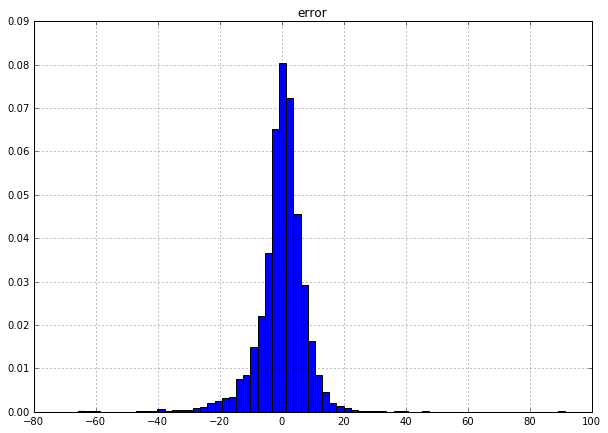

In [49]:
lgbm_model.plot_histogram_error()

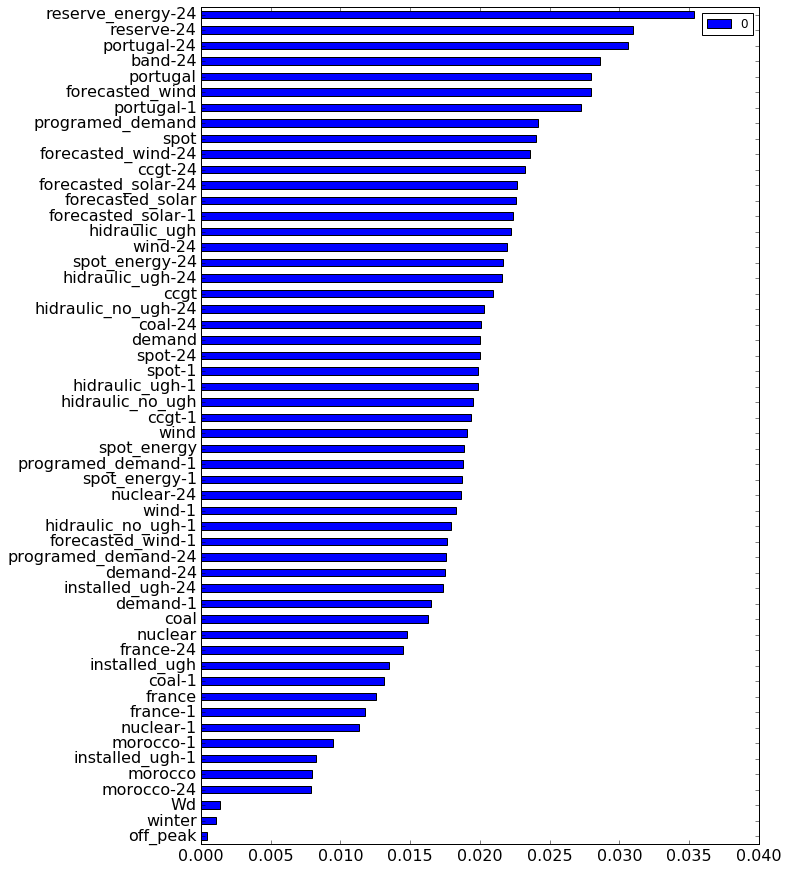

In [50]:
lgbm_model.plot_feature_importance()